In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline
plt.style.use('seaborn')

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
ls

log_brake_24_Juli_2020-07-24-14-21-50.bag  rosbag_TA_17_Juli_2020/  test.ipynb
rosbag_TA/                                 rosbag_test/


# Perlakuan 1

In [3]:
bag = rosbag.Bag('log_brake_24_Juli_2020-07-24-14-21-50.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/LogArduino': 'ea393fd09273b840e55feba3bf682d96'}, topics={'/logging_brake': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=15645, connections=1, frequency=196.06881077038145)})

In [25]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_current = []
list_position = []
list_delta = []
list_pwm = []

for topic, msg, t in bag.read_messages(topics=['/logging_brake']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_current.append(msg.brake_current)
    list_position.append(msg.brake_position)
    list_delta.append(msg.braking_delta)
    list_pwm.append(msg.brake_pwm)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header = np.array(list_t_header)
list_t_header -= list_t_header[0]

list_current = np.array(list_current)
list_delta = np.array(list_delta)

In [26]:
dt = list_t[1:] - list_t[:-1]
dt_header = list_t_header[1:] - list_t_header[:-1]

In [27]:
print('Sampling Rate yang digunakan di rospy adalah 250 Hz\n')
print('dt')
print('mean: {}'.format(np.mean(dt)))
print('std: {}'.format(np.std(dt)))
print('\ndt_header')
print('mean: {}'.format(np.mean(dt_header)))
print('std: {}'.format(np.std(dt_header)))

Sampling Rate yang digunakan di rospy adalah 250 Hz

dt
mean: 0.005019360355512774
std: 0.0005045701799646537

dt_header
mean: 0.005019341869081143
std: 0.00014797224703387517


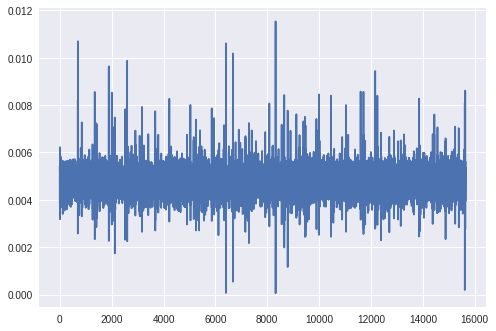

In [28]:
plt.plot(dt)

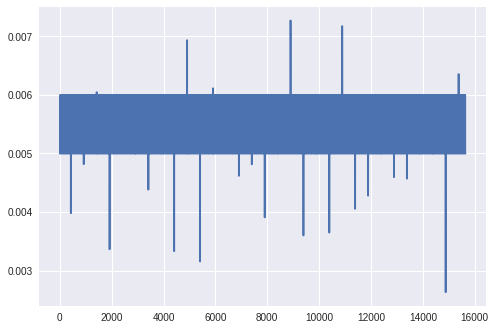

In [29]:
plt.plot(dt_header)

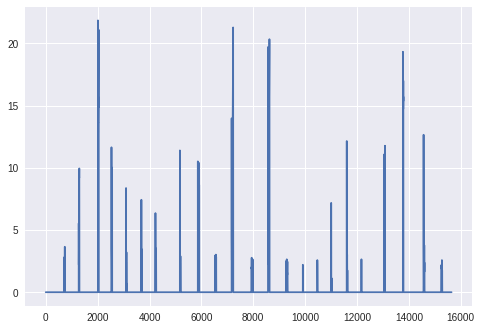

In [30]:
plt.plot(list_current)

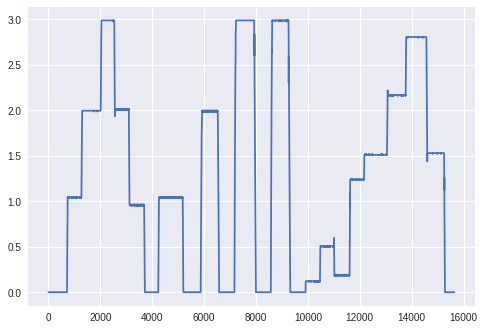

In [31]:
plt.plot(list_position)
#plt.plot(list_current)

In [32]:
list_Current = np.copy(list_current)
for i in range(list_current.shape[0]):
    if list_delta[i] < 0.:
        list_Current[i] *= -1

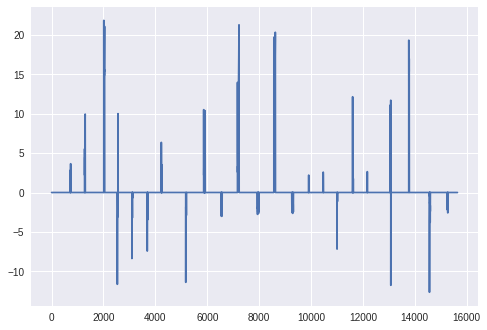

In [33]:
plt.plot(list_Current)

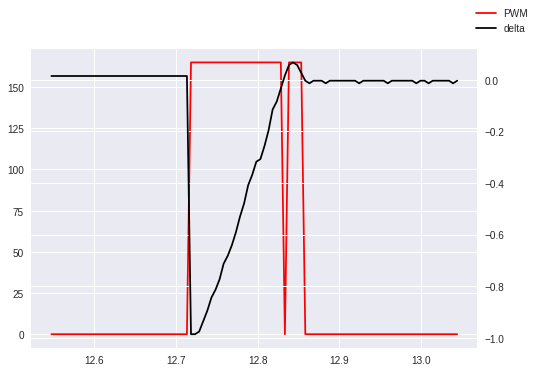

In [105]:
lim0 = 2500
lim1 = 2600

fig,ax = plt.subplots()
ax2 = ax.twinx()

#ax.plot(list_t_header[lim0:lim1], list_Current[lim0:lim1], label='Current', color='blue')
#ax.plot(list_t_header[lim0:lim1], list_position[lim0:lim1], label='Current', color='blue')
ax.plot(list_t_header[lim0:lim1], list_pwm[lim0:lim1], label='PWM', color='red')
ax2.plot(list_t_header[lim0:lim1], list_delta[lim0:lim1], label='delta', color='black')
fig.legend()

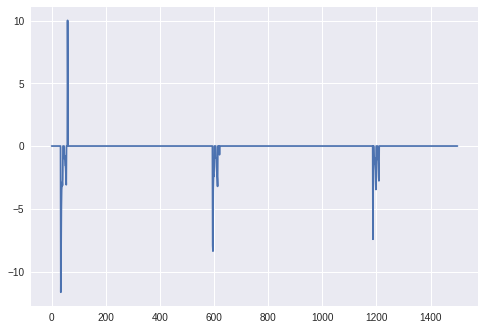

In [92]:
plt.plot(list_Current[2500:4000])